# Prep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [ ]:
folder_path = '/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/dataset/processed'

# List all files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []
labels = []
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)
    match = re.search(r"processed-(\d+)", file_name)
    label = match.group(1) # label them based on the first number in the file name
    df["label"] = int(label)
    labels.append(label)
    dfs.append(df)
print(len(dfs))
print(len(labels))

6
6


In [ ]:
merged_df = pd.concat(dfs, axis=0, ignore_index=True)
print(merged_df.shape)

(66566, 53)


In [ ]:
label_counts = merged_df["label"].value_counts()
print(label_counts)

label
4    11746
5    11687
3    11377
2    11118
0    10411
1    10227
Name: count, dtype: int64


# Model Training (DNN)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
X = merged_df.drop("label", axis=1)
y = merged_df["label"]

print("Flattened Features (X):")
print(X.shape)
print("Labels (y):")
print(y.shape)

Flattened Features (X):
(66566, 52)
Labels (y):
(66566,)


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(53252, 52)
(53252,)
(13314, 52)
(13314,)


In [ ]:
label_counts = y_test.value_counts()
print(label_counts)

label
5    2374
4    2340
3    2313
2    2207
0    2065
1    2015
Name: count, dtype: int64


In [ ]:
label_counts = y_train.value_counts()
print(label_counts)

label
4    9406
5    9313
3    9064
2    8911
0    8346
1    8212
Name: count, dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='mse',
              metrics=['mae'])

In [ ]:
# early stopping setting
early_stopping =  EarlyStopping(
                            monitor='val_mae',
                            min_delta=0,
                            patience=10,
                            verbose=1,
                            mode='auto')

In [ ]:
# fit
history = model.fit(X_train, y_train,
                      batch_size=100,
                      epochs=200,
                      verbose=1,
                      validation_split=0.2,
                    callbacks=(early_stopping))

Epoch 1/200
427/427 [==============================] - 8s 14ms/step - loss: 1.3362 - mae: 0.9102 - val_loss: 0.5818 - val_mae: 0.6077
Epoch 2/200
427/427 [==============================] - 8s 18ms/step - loss: 0.6715 - mae: 0.6517 - val_loss: 0.4075 - val_mae: 0.4828
Epoch 3/200
427/427 [==============================] - 6s 13ms/step - loss: 0.5545 - mae: 0.5774 - val_loss: 0.3777 - val_mae: 0.4537
Epoch 4/200
427/427 [==============================] - 8s 18ms/step - loss: 0.5004 - mae: 0.5413 - val_loss: 0.3891 - val_mae: 0.4701
Epoch 5/200
427/427 [==============================] - 6s 13ms/step - loss: 0.4775 - mae: 0.5253 - val_loss: 0.3765 - val_mae: 0.4534
Epoch 6/200
427/427 [==============================] - 7s 17ms/step - loss: 0.4472 - mae: 0.5032 - val_loss: 0.4203 - val_mae: 0.4876
Epoch 7/200
427/427 [==============================] - 6s 15ms/step - loss: 0.4221 - mae: 0.4865 - val_loss: 0.2926 - val_mae: 0.3810
Epoch 8/200
427/427 [==============================] - 6s 14ms

# Test model

In [ ]:
y_pred = model.predict(X_test)

 # Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

417/417 [==============================] - 1s 3ms/step
Mean Squared Error: 0.14976763641993557
Mean Absolute Error: 0.2671054771128889


In [ ]:
def compare_TV(history, train_met, val_met):
    acc = history.history[train_met]
    val_acc = history.history[val_met]
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo' ,label = 'training '+train_met)
    plt.plot(epochs, val_acc, 'b' , label= 'validation '+val_met)
    plt.title('Training and Validation metrics')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo' ,label = 'training loss')
    plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

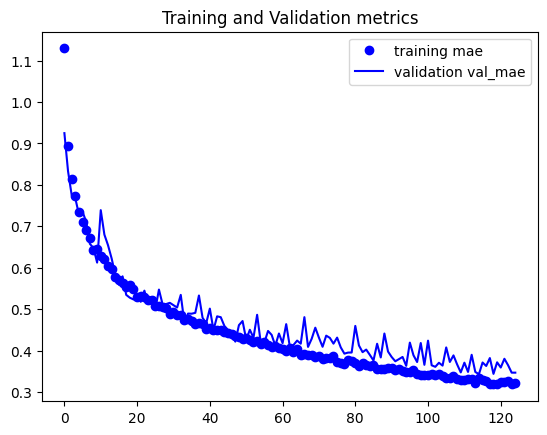

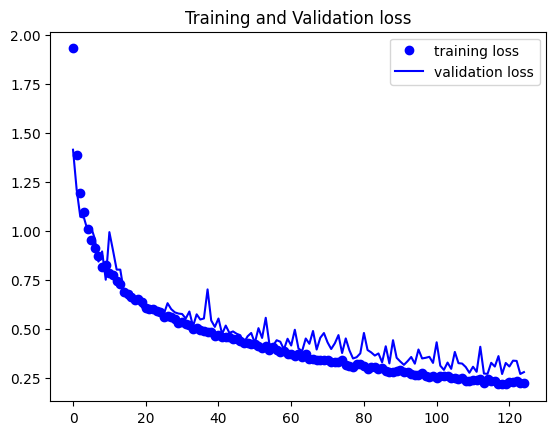

In [ ]:
compare_TV(history, "mae", "val_mae")


In [ ]:
import tensorflow as tf

# Assuming 'model' is your trained model
model.save('/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_DNNR_2.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# RFR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=None,random_state=42,max_features='log2',min_samples_leaf=1,n_estimators=200,min_samples_split=2)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Model Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Model Mean Absolute Error (MSE): {mae}')

Model Mean Squared Error (MSE): 0.15983225927595013
Model Mean Absolute Error (MSE): 0.22580366531470628


In [ ]:
import joblib

joblib.dump(rf, '/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_RFR_2.pkl')


['/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_RFR_2.pkl']

# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

# Train the Ridge Regression model
ridge = Ridge(alpha=200, solver='svd')
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Model Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Model Mean Absolute Error (MSE): {mae}')

Model Mean Squared Error (MSE): 1.0785610688574032
Model Mean Absolute Error (MSE): 0.8276112374126471


In [ ]:
joblib.dump(ridge, '/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_LRR_2.pkl')

['/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_LRR_2.pkl']

# SVR

In [ ]:
from sklearn.svm import SVR
# Train the Support Vector Regressor
svr = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')
svr.fit(X_train, y_train)

# Evaluate the model
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Model Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Model Mean Absolute Error (MSE): {mae}')

# LGBM

In [ ]:
import lightgbm as lgb


# Define the LGBM model parameters
lgb_params = {
    'objective': 'regression',  # Set objective for regression
    'metric': 'l2',  # Mean squared error (l2) as evaluation metric
    'learning_rate': 0.1,  # Adjust learning rate as needed
    'num_leaves': 31,  # Number of leaves in trees (experiment with different values)
    'max_depth': -1,  # Use all tree depth (can be adjusted)
    'min_data_in_leaf': 20,  # Minimum data points per leaf (experiment with different values)
    'feature_fraction': 0.9,  # Fraction of features used per tree (experiment with different values)
    'bagging_fraction': 0.8,  # Bagging fraction (experiment with different values)
    'bagging_freq': 5,  # Bagging frequency (experiment with different values)
}

# Create the LGBM training dataset
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(X_test, label=y_test, reference=lgb_train)  # For evaluation during training

In [ ]:
# Train the LGBM model
model = lgb.train(lgb_params, lgb_train, valid_sets=[lgb_eval])

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (using metrics like mean squared error or MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Model Mean Squared Error (MSE): {mse}')
print(f'Model Mean Absolute Error (MAE): {mae}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13260
[LightGBM] [Info] Number of data points in the train set: 53252, number of used features: 52
[LightGBM] [Info] Start training from score 2.580466
Model Mean Squared Error (MSE): 0.2222234385852217
Model Mean Absolute Error (MAE): 0.28771741168229675


In [ ]:
joblib.dump(model, '/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_LGB_2.pkl')


['/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/WiCount_LGB_2.pkl']

# DNNR GridSearch

In [ ]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

opt = Adam(learning_rate=0.0001)

model.compile(optimizer=opt,
              loss='mse',
              metrics=['mae'])

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.6 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def create_model(hp):
 # create model
  model = Sequential()
  hp_units1 = hp.Int('units1', min_value=512, max_value=1000, step=30)
  hp_units2 = hp.Int('units2', min_value=200, max_value=500, step=30)
  hp_units3 = hp.Int('units3', min_value=50, max_value=100, step=20)
  model.add(Dense(units=hp_units1, activation='relu', input_shape=(X.shape[1],)))
  model.add(Dense(units=hp_units2, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=hp_units3, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(1))
 # Compile model
  opt = Adam(learning_rate=0.0001)
  model.compile(optimizer=opt,
              loss='mse',
              metrics=['mae'],
              )
  return model


tuner = kt.Hyperband(create_model,
                     objective='val_mae',
                     max_epochs=100,
                     factor=3,
                      directory='/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/tuner',
                     project_name='dnnr_1')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)


In [ ]:
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, batch_size=100, callbacks=[stop_early])



Trial 190 Complete [00h 01m 25s]
val_mae: 0.3451274633407593

Best val_mae So Far: 0.20123621821403503
Total elapsed time: 01h 07m 24s

Search: Running Trial #191

Value             |Best Value So Far |Hyperparameter
632               |782               |units1
350               |440               |units2
70                |90                |units3
12                |100               |tuner/epochs
4                 |34                |tuner/initial_epoch
3                 |4                 |tuner/bracket
1                 |4                 |tuner/round
0180              |0143              |tuner/trial_id

Epoch 5/12
424/427 [============================>.] - ETA: 0s - loss: 0.5060 - mae: 0.5446

KeyboardInterrupt: 

In [ ]:
# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')}, {best_hps.get('units2')}, and {best_hps.get('units3')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 782, 440, and 90.



In [ ]:
dnn_model = tuner.hypermodel.build(best_hps)

# fit
history = dnn_model.fit(X_train, y_train,
                      batch_size=100,
                      epochs=200,
                      verbose=1,
                      validation_split=0.2,
                    callbacks=(early_stopping))

Epoch 1/200
427/427 [==============================] - 6s 11ms/step - loss: 1.7906 - mae: 1.0201 - val_loss: 0.6744 - val_mae: 0.6574
Epoch 2/200
427/427 [==============================] - 5s 12ms/step - loss: 0.7426 - mae: 0.6847 - val_loss: 0.7683 - val_mae: 0.6972
Epoch 3/200
427/427 [==============================] - 6s 14ms/step - loss: 0.6727 - mae: 0.6456 - val_loss: 0.4072 - val_mae: 0.4843
Epoch 4/200
427/427 [==============================] - 5s 11ms/step - loss: 0.5630 - mae: 0.5827 - val_loss: 0.4964 - val_mae: 0.5450
Epoch 5/200
427/427 [==============================] - 6s 13ms/step - loss: 0.5207 - mae: 0.5557 - val_loss: 0.6415 - val_mae: 0.5960
Epoch 6/200
427/427 [==============================] - 8s 19ms/step - loss: 0.4928 - mae: 0.5392 - val_loss: 0.3309 - val_mae: 0.4185
Epoch 7/200
427/427 [==============================] - 5s 11ms/step - loss: 0.4634 - mae: 0.5190 - val_loss: 0.4606 - val_mae: 0.5311
Epoch 8/200
427/427 [==============================] - 7s 15ms

KeyboardInterrupt: 

In [ ]:
y_pred = dnn_model.predict(X_test)

 # Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

417/417 [==============================] - 1s 2ms/step
Mean Squared Error: 0.16858302116054308
Mean Absolute Error: 0.23637757815988067


In [ ]:
dnn_model.save("/content/drive/MyDrive/01.School_related/DoAnChuyenNganh/models/"